In [55]:
import sys
import os
src = os.path.dirname(os.path.abspath(''))
if src not in sys.path: sys.path.append(src)

In [56]:
import pandas as pd
from matplotlib import pyplot as plt
from src.db.database import connect
from src.helpers.h6_analysis_helpers import create_repositories_piechart, calculate_nested_frequencies

## 5 - How many people are usually directly involved in the project?

In [57]:
with connect() as session:
    repositories = pd.read_sql_table("repositories", session.connection())
repository_contributors = repositories[["id", "repository", "contributors"]]
print(f"In {len(repositories)} repositories {repository_contributors.contributors.sum()} contributors were found.")

In 10 repositories 760 contributors were found.


In [58]:
no_contributors = repository_contributors[repository_contributors.contributors == 0]
single_contributors = repository_contributors[repository_contributors.contributors == 1]
multiple_contributors = repository_contributors[repository_contributors.contributors >= 2]
print(f"Repositories with Single Contributors: {len(single_contributors)}\n"
      f"Repositories with Multiple Contributors: {len(multiple_contributors)}\n"
      f"Repositores with no contributors:{len(no_contributors)}", end='')
if len(no_contributors) == 0: print(" (As expected, given that they were filtered out)")

Repositories with Single Contributors: 1
Repositories with Multiple Contributors: 9
Repositores with no contributors:0 (As expected, given that they were filtered out)


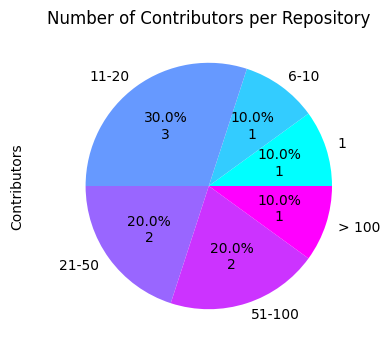

In [59]:
fig1, ax1 = create_repositories_piechart(repository_contributors, "contributors")

## 6 - What is the average number of Commits in Data Science projects?
In this section we will investigate commits and how they behave. Merges were excluded.

In [60]:
with connect() as session:
    all_commits = pd.read_sql_table("commits", session.connection())
normal_commits = all_commits[all_commits.type=="commit"]
merge_commits = all_commits[all_commits.type=="merge"]
print(f"In all {len(repositories)} repositories {len(all_commits)} commits were found, that are divided in:")
print(f"- Normal Commits: {len(normal_commits)}")
print(f"- Merge Commits: {len(merge_commits)}")

In all 10 repositories 4931 commits were found, that are divided in:
- Normal Commits: 4248
- Merge Commits: 683


#### Average of Commits

In [61]:
normal_commits_per_repository = normal_commits.repository_id.value_counts()\
    .rename_axis('repository_id').to_frame("commits").reset_index(drop=False).sort_values(by='repository_id')
normal_mean =  normal_commits_per_repository.commits.mean()

merge_commits_per_repository = merge_commits.repository_id.value_counts()\
    .rename_axis('repository_id').to_frame("commits").reset_index(drop=False).sort_values(by='repository_id')
merge_mean =  merge_commits_per_repository.commits.mean()

print("Considering all %d repositories, on average each repository"
      " has %.2f normal commits and %.2f merge commits."
      % (len(normal_commits_per_repository), normal_mean, merge_mean))

Considering all 10 repositories, on average each repository has 424.80 normal commits and 75.89 merge commits.


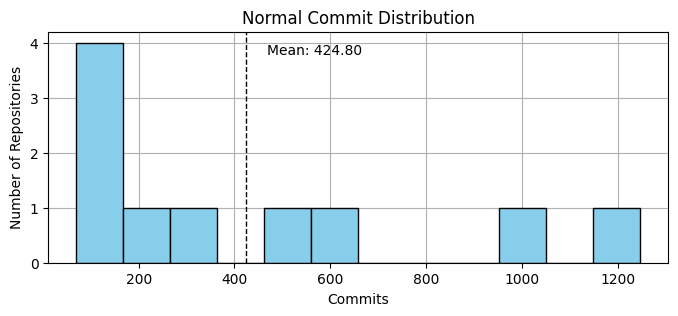

In [62]:
fig2, ax2 = plt.subplots(figsize=(8,3))
normal_commits_per_repository.commits.hist(ax=ax2, bins= 12, color='skyblue', edgecolor='k',zorder=2)
plt.title('Normal Commit Distribution')
plt.xlabel('Commits')
plt.ylabel('Number of Repositories')
plt.axvline(normal_mean, color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim2 = plt.ylim()
plt.text(normal_mean*1.1, max_ylim2*0.9, 'Mean: {:.2f}'.format(normal_mean));

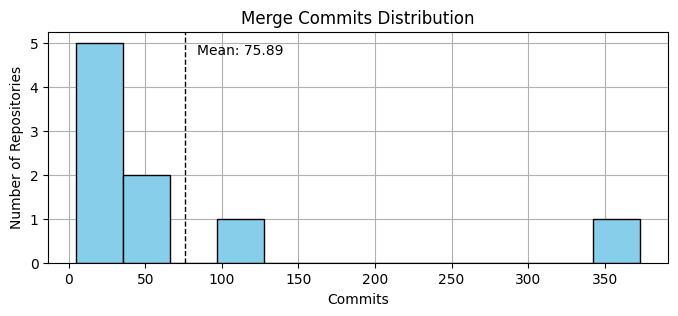

In [63]:
fig3, ax3 = plt.subplots(figsize=(8,3))
merge_commits_per_repository.commits.hist(ax=ax3, bins= 12, color='skyblue', edgecolor='k',zorder=2)
plt.title('Merge Commits Distribution')
plt.xlabel('Commits')
plt.ylabel('Number of Repositories')
plt.axvline(merge_mean, color='k', linestyle='dashed', linewidth=1)
min_ylim3, max_ylim3 = plt.ylim()
plt.text(merge_mean*1.1, max_ylim3*0.9, 'Mean: {:.2f}'.format(merge_mean));

### 6.1 - How often are commits made?
In this section we investigate how long it takes from one commit to another.

In [64]:
repositories_with_normal_commits = calculate_nested_frequencies(normal_commits_per_repository, normal_commits)
normal_mean = repositories_with_normal_commits.frequency_timedelta.mean()

repositories_with_merge_commits = calculate_nested_frequencies(merge_commits_per_repository, merge_commits)
merge_mean = repositories_with_merge_commits.frequency_timedelta.mean()

print(f"Considering all {len(normal_commits_per_repository)} repositories:")
print(f"- Normal Commits are made on average every {normal_mean}.")
print(f"- Merge Commits are made on average every {merge_mean}.")

Considering all 10 repositories:
- Normal Commits are made on average every 8 days 02:05:20.586488940.
- Merge Commits are made on average every 40 days 02:53:02.351015030.


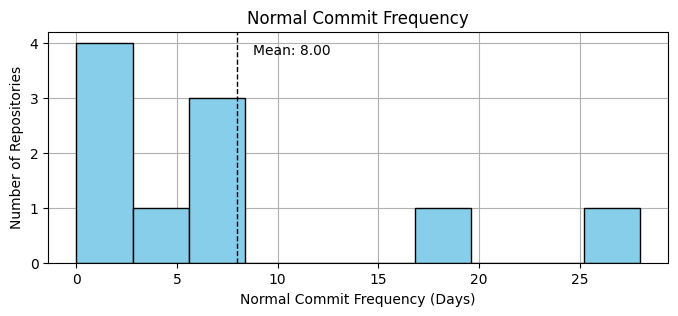

In [65]:
fig4, ax4 = plt.subplots(figsize=(8,3))
mean = normal_mean.days
repositories_with_normal_commits.frequency_days.hist(ax=ax4, color='skyblue', edgecolor='k',zorder=2)
plt.title('Normal Commit Frequency')
plt.xlabel('Normal Commit Frequency (Days)')
plt.ylabel('Number of Repositories')
plt.axvline(mean, color='k', linestyle='dashed', linewidth=1)
min_ylim4, max_ylim4 = plt.ylim()
plt.text(mean*1.1, max_ylim4*0.9, 'Mean: {:.2f}'.format(mean));

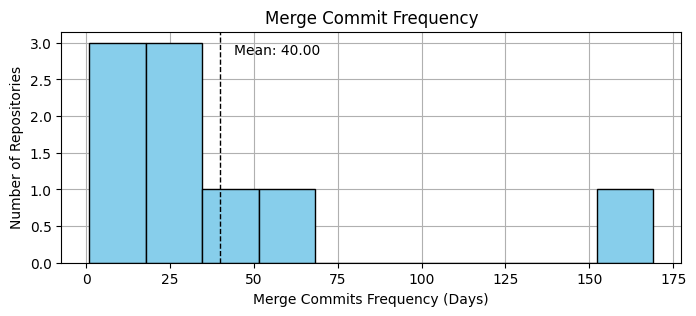

In [66]:
fig5, ax5 = plt.subplots(figsize=(8,3))
mean = merge_mean.days
repositories_with_merge_commits.frequency_days.hist(ax=ax5, color='skyblue', edgecolor='k',zorder=2)
plt.title('Merge Commit Frequency')
plt.xlabel('Merge Commits Frequency (Days)')
plt.ylabel('Number of Repositories')
plt.axvline(mean, color='k', linestyle='dashed', linewidth=1)
min_ylim5, max_ylim5 = plt.ylim()
plt.text(mean*1.1, max_ylim5*0.9, 'Mean: {:.2f}'.format(mean));

## 7 - Como  o repositório é usado no github?
In this section we will explore how some of Git and Github features are used in the corpus.

### 7.1 - Branches

In [67]:
repository_branches = repositories[["id","repository","branches"]]
print(f"In {len(repositories)} repositories "
      f"{repository_branches.branches.sum()} branches were found.")

In 10 repositories 67 branches were found.


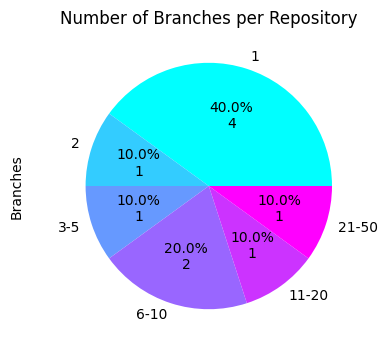

In [68]:
fig6, ax6 = create_repositories_piechart(repository_branches, "branches")

### 7.2 - Forks

In [69]:
repository_forks = repositories[["id","repository","forks"]]
print(f"In {len(repositories)} repositories "
      f"{repository_forks.forks.sum()} forks were found.")

In 10 repositories 35569 forks were found.


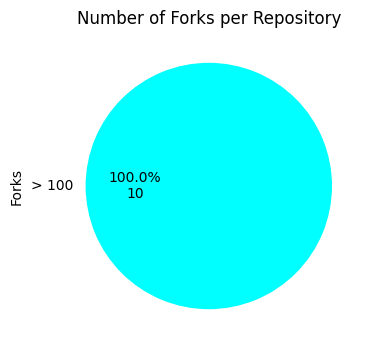

In [70]:
fig7, ax7 = create_repositories_piechart(repository_forks, "forks")

## 7.3 - Issues

In [71]:
repository_issues = repositories[["id","repository","issues"]]
print(f"In {len(repositories)} repositories "
      f"{repository_issues.issues.sum()} issues were found.")

In 10 repositories 838 issues were found.


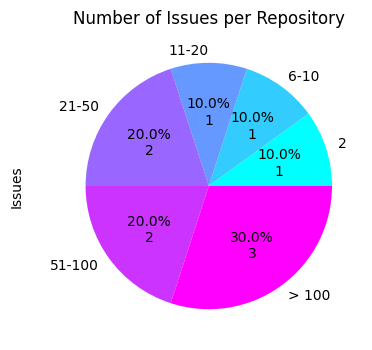

In [72]:
fig8, ax8 = create_repositories_piechart(repository_issues, "issues")

### 7.4 - Stars

In [73]:
repository_stargazers = repositories[["id","repository","stargazers"]]
print(f"In {len(repositories)} repositories "
      f"{repository_stargazers.stargazers.sum()} stargazers were found.")

In 10 repositories 108097 stargazers were found.


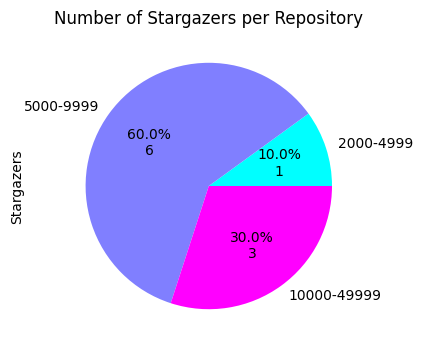

In [74]:
bins = [0, 99, 999, 1999, 4999, 9999, 49999, 1000000]
labels = ["< 100", "100-999", "1000-1999", "2000-4999", "5000-9999", "10000-49999", "> 50000"]
fig9, ax9 = create_repositories_piechart(repository_stargazers, "stargazers", bins=bins, labels=labels)